In [ ]:
import kagglehub
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For display and warnings
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import warnings
warnings.filterwarnings("ignore")



In [ ]:
# Download latest version*
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

# Read the CSV from the correct location
df = pd.read_csv(f"{path}/creditcard.csv")
# Use the full path returned by kagglehub

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [ ]:
# Shape, datatypes, nulls
print("Dataset shape:", df.shape)
print("\nData types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nClass distribution:\n", df['Class'].value_counts())


Dataset shape: (284807, 31)

Data types:
 Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

Missing values:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class   

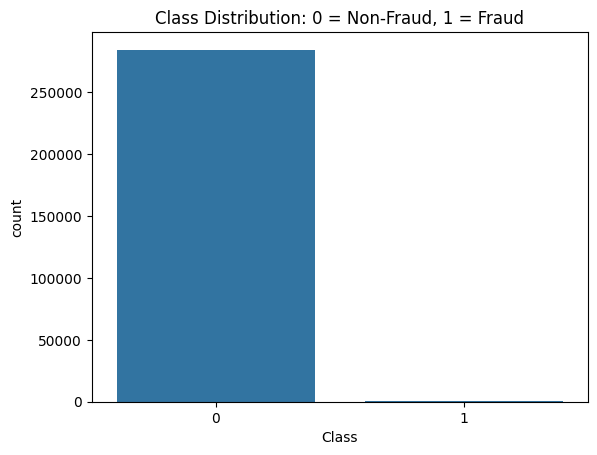

Fraud cases: 492 (0.1727%)


In [ ]:
# Class distribution plot
sns.countplot(x='Class', data=df)
plt.title("Class Distribution: 0 = Non-Fraud, 1 = Fraud")
plt.show()

fraud_ratio = df['Class'].mean() * 100
print(f"Fraud cases: {df['Class'].sum()} ({fraud_ratio:.4f}%)")


Distribution of Features

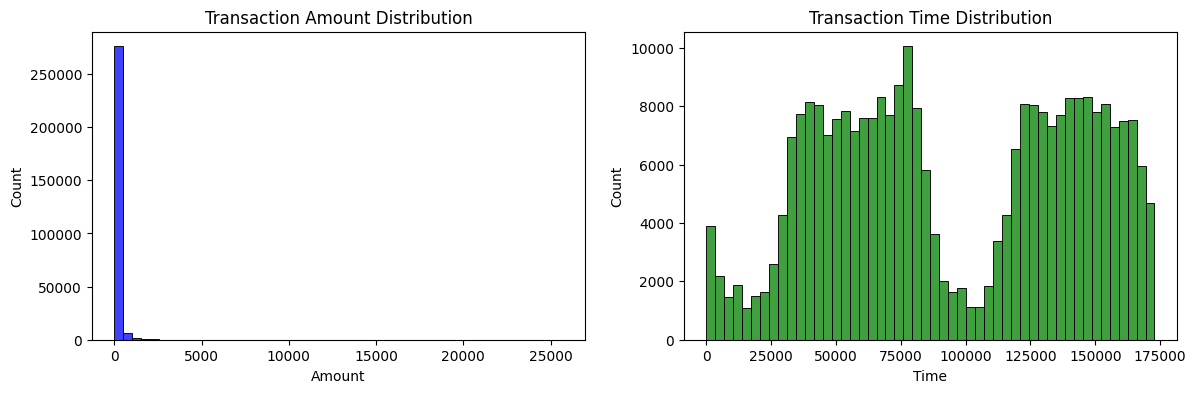

In [ ]:
# Plot amount and time
fig, axs = plt.subplots(1, 2, figsize=(14, 4))

sns.histplot(df['Amount'], bins=50, ax=axs[0], color='blue')
axs[0].set_title('Transaction Amount Distribution')

sns.histplot(df['Time'], bins=50, ax=axs[1], color='green')
axs[1].set_title('Transaction Time Distribution')

plt.show()


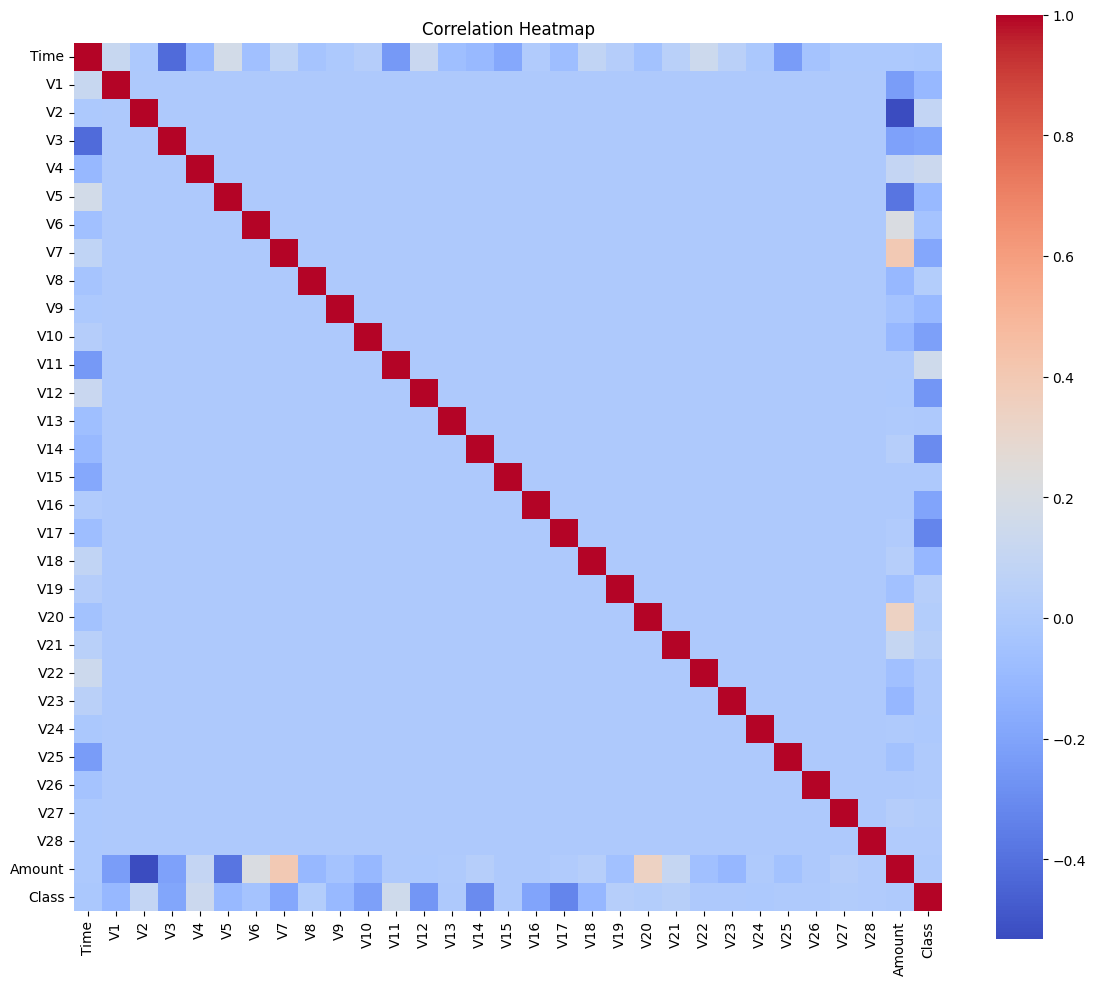

In [ ]:
corr = df.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()


Here , I wanted to compare and analyse features by Class:

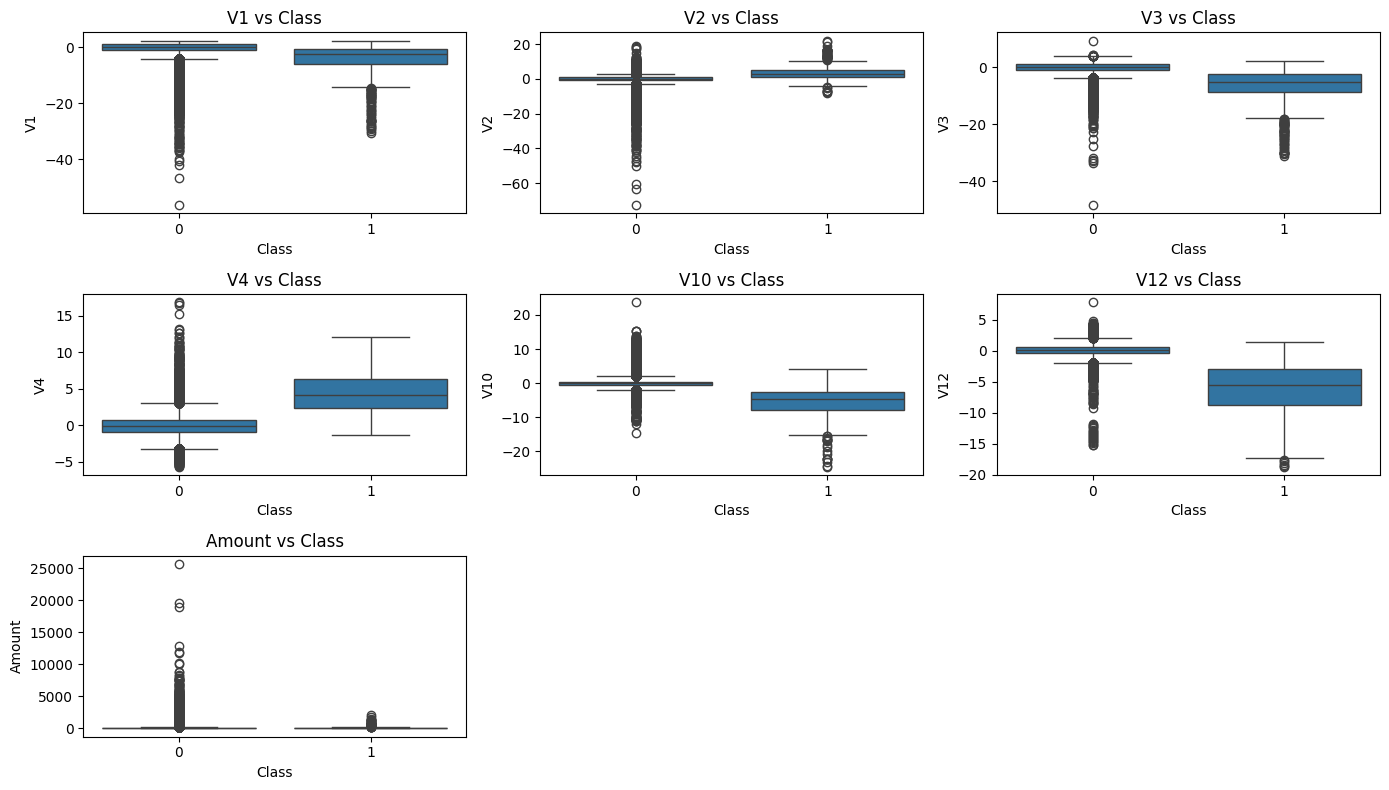

In [ ]:
fraud_df = df[df['Class'] == 1]
non_fraud_df = df[df['Class'] == 0]

# Boxplot for a few V features
features_to_plot = ['V1', 'V2', 'V3', 'V4', 'V10', 'V12', 'Amount']

plt.figure(figsize=(14, 8))
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Class', y=feature, data=df)
    plt.title(f'{feature} vs Class')
plt.tight_layout()
plt.show()


### Observations
- The dataset is highly imbalanced (only 0.17% are fraud).
- Features V1–V28 are anonymized PCA components.
- 'Amount' and some V features show different distributions across fraud/non-fraud.
- Some features like V14, V10, and V12 show high separability — could be predictive.
